| <p style="text-align: left;">Name</p>               | <p style="text-align: right;">Date</p> |
| ---------------------------------------------------| ------------------------------------- |
| <p style="text-align: left">Diaaeldin SHALABY</p>   | 14.04.2021                            |

<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 1 &mdash; Recap Hands-on AI I (Assignment)</h2>

<b>Authors:</b> S. Lehner, J. Brandstetter, B. Schäfl<br>
<b>Date:</b> 26-03-2021

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2>Table of contents</h2>
<ol>
    <a href="#exercise-tabular-data"><li style="font-size:large;font-weight:bold">Tabular data</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-tabular-data-one"><li style="font-size:medium">Loading and visualizing</li></a>
        <a href="#exercise-tabular-data-two"><li style="font-size:medium">Inspecting the pairplot</li></a>
        <a href="#exercise-tabular-data-three"><li style="font-size:medium">Downprojecting and clustering</li></a>
    </ol>
    <a href="#exercise-sequence-data"><li style="font-size:large;font-weight:bold">Sequence data</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-sequence-data-one"><li style="font-size:medium">Loading and visualizing</li></a>
        <a href="#exercise-sequence-data-two"><li style="font-size:medium">Inspecting the lineplots</li></a>
        <a href="#exercise-sequence-data-three"><li style="font-size:medium">Constructing new features</li></a>
    </ol>
    <a href="#exercise-image-data"><li style="font-size:large;font-weight:bold">Image data</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-image-data-one"><li style="font-size:medium">Loading and custom filters</li></a>
        <a href="#exercise-image-data-two"><li style="font-size:medium">Constructing a CNN network</li></a>
        <a href="#exercise-image-data-three"><li style="font-size:medium">Training a CNN network</li></a>
    </ol>
</ol>

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>
This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u1_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u1_utils.py</code> need to be installed.

In [1]:
# Import pre-defined utilities specific to this notebook.
import u1_utils as u1

# Import additional utilities needed in this notebook.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import random
import tqdm

from pathlib import Path
from PIL import Image
from scipy import signal
from sklearn.neighbors import KNeighborsClassifier

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u1.setup_jupyter()

<h3 style="color:rgb(0,120,170)">Module versions</h3>
As mentioned in the introductiory slides, specific minimum versions of Python itself as well as of used modules is recommended.

In [2]:
u1.check_module_versions()

Installed Python version: 3.8 (✓)
Installed numpy version: 1.19.1 (✓)
Installed pandas version: 1.1.3 (✓)
Installed PyTorch version: 1.7.1 (✓)
Installed scikit-learn version: 0.23.2 (✓)
Installed scipy version: 1.5.0 (✓)
Installed matplotlib version: 3.3.1 (✓)
Installed seaborn version: 0.11.0 (✓)
Installed PIL version: 8.0.0 (✓)


<a name="exercise-tabular-data"></a><h2>Tabular data</h2>

<p>In this exercise you'll be working with another famous data set, the <i>iris</i> data set. It is composed of various measurements of physical attributes of iris flowers. The data set distinguishes <i>three</i> different classes, one for each type of iris flower. It was published by:

<center><cite>Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936)</cite></center>

Currently, it is maintained by the <a href="https://archive.ics.uci.edu/ml">UCI Machine Learning Repository</a>:

<center><cite>Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.</cite></center></p>

<a name="exercise-tabular-data-one"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Load the <i>iris</i> data set using the appropriate function as supplied by us.</li>
        <li>Visualize the iris data set in tabular form. What is the size of the data set with respect to sample and feature counts?</li>
    </ul>
</div>

In [3]:
iris_data = u1.load_iris()
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<a name="exercise-tabular-data-two"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Compute a pairplot of the iris data set with respect to <i>all</i> features.</li>
        <li>Which type(es) of iris flower may be linearly separable by which feature(s), if any?</li>
    </ul>
</div>

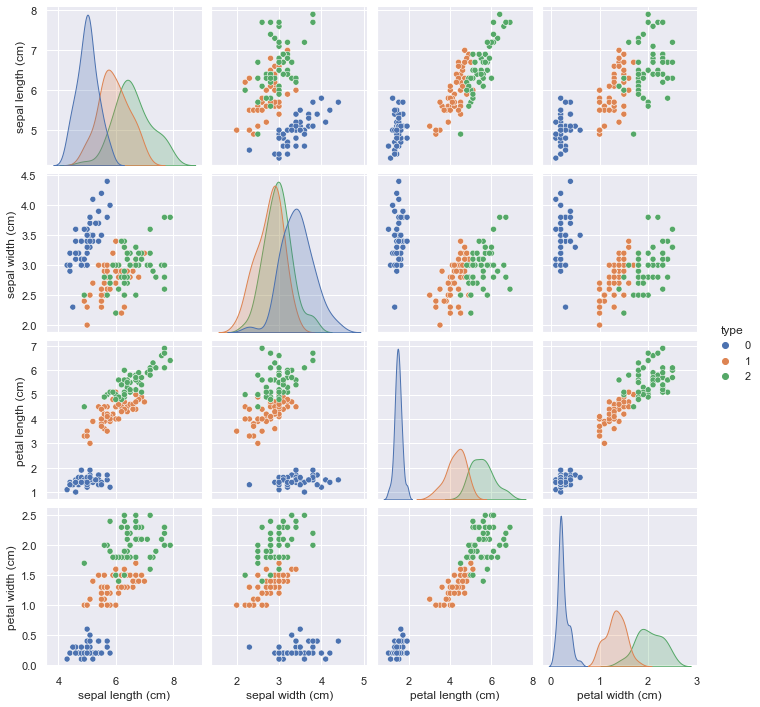

In [4]:
sns.set()

type = iris_data[r'type'].unique().size
features = [r'sepal length (cm)',r'sepal width (cm)',r'petal length (cm)',r'petal width (cm)']
_ = sns.pairplot(iris_data, vars=features, hue=r'type', diag_kind=r'kde', palette=sns.color_palette()[:type])

<a name="exercise-tabular-data-three"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Reduce the dimensionality of the iris data set using <i>PCA</i> as well as <i>t-SNE</i> and visualize the downprojections.</li>
        <li>Apply $k$-means as well as <i>affinity propagation</i> on the downprojected data sets. Which combination works best. Interpret your results.</li>
    </ul>
</div>

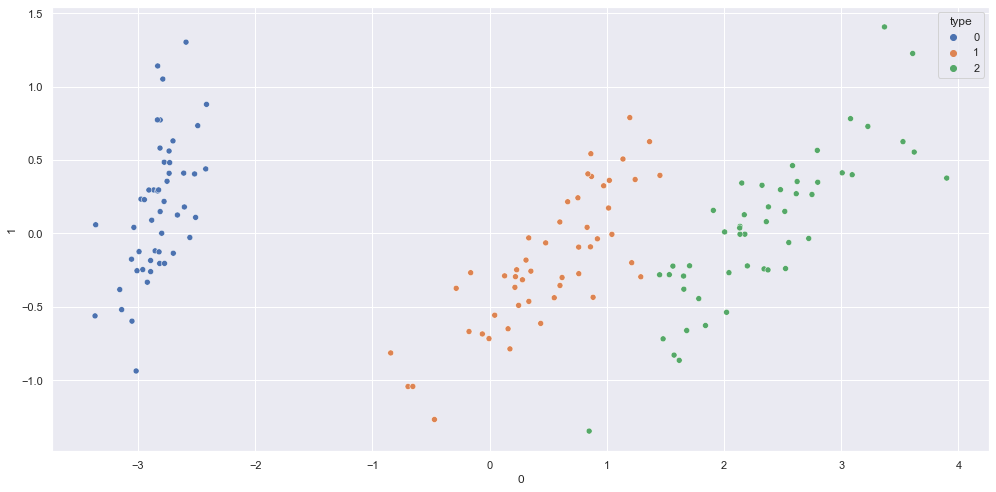

In [5]:
#PCA dimentionality reduction

sns.set()
np.random.seed(seed=42)

# Compute Principal Component Analysis (PCA) and reduce the dimensionality of the iris data set.
iris_data_pca = u1.apply_pca(n_components=2, data=iris_data, target_column=r'type')
u1.plot_points_2d(data=iris_data_pca, target_column=r'type', figsize=(14, 7))

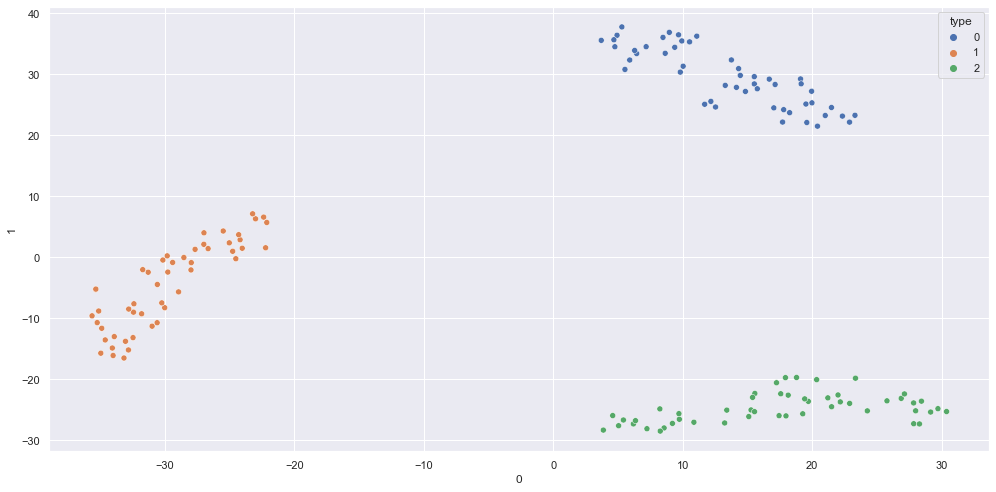

In [6]:
#t-SNE dimentionality reduction

sns.set()
np.random.seed(seed=42)

# Compute t-SNE and reduce the dimensionality of the iris data set.
iris_data_tsne = u1.apply_tsne(n_components=2, data=iris_data, target_column=r'type')
u1.plot_points_2d(data=iris_data_tsne, target_column=r'type', figsize=(14, 7))

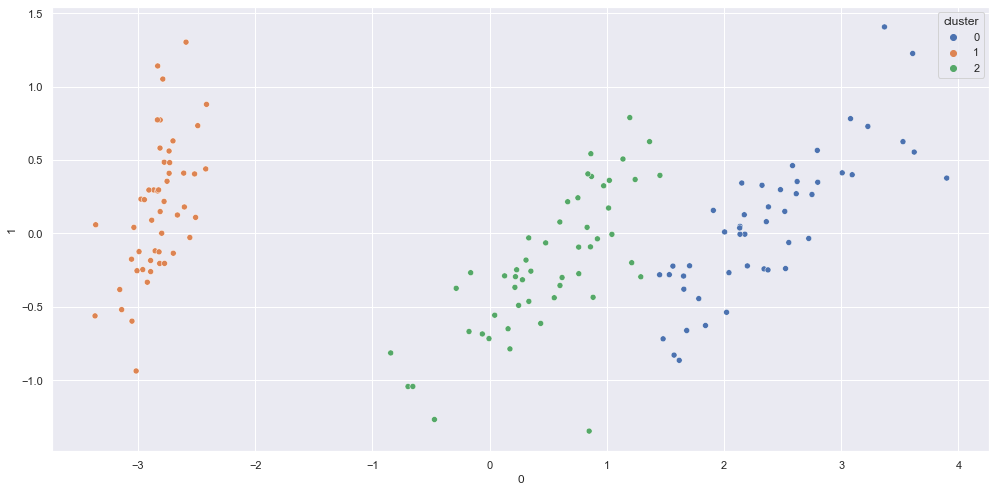

In [7]:
#k-means clusterring with pca

iris_data_kmeans = iris_data_pca.copy()
iris_data_kmeans = iris_data_kmeans.rename(columns = {r'type':r'cluster'})
iris_data_kmeans[r'cluster'] = u1.apply_k_means(k=3, data = iris_data)
u1.plot_points_2d(data=iris_data_kmeans, target_column=r'cluster', figsize=(14, 7))

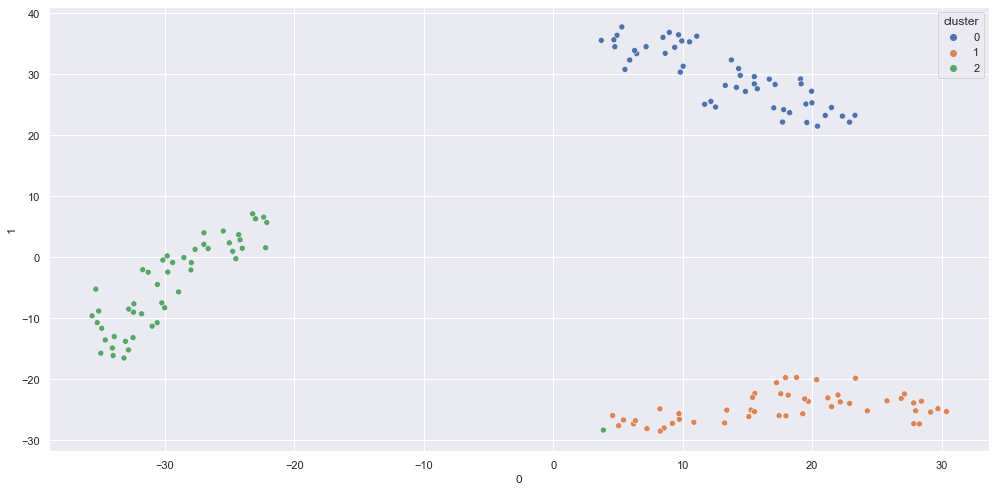

In [8]:
#k-means clusterring with tsne

iris_data_kmeans = iris_data_tsne.copy()
iris_data_kmeans = iris_data_kmeans.rename(columns = {r'type':r'cluster'})
iris_data_kmeans[r'cluster'] = u1.apply_k_means(k=3, data = iris_data)
u1.plot_points_2d(data=iris_data_kmeans, target_column=r'cluster', figsize=(14, 7))

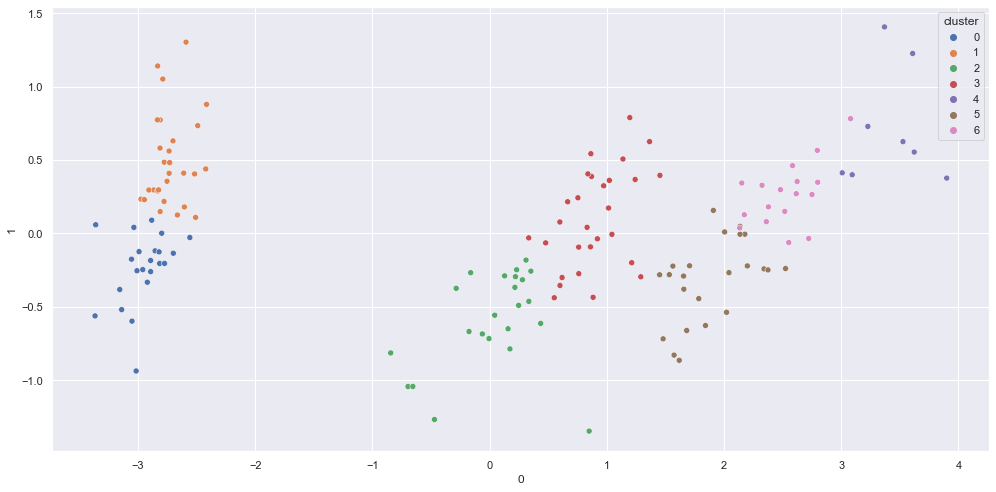

In [9]:
#affinity propagation with pca

iris_data_affinity_propagation = iris_data_pca.copy()
iris_data_affinity_propagation = iris_data_affinity_propagation.rename(columns = {r'type':r'cluster'})
iris_data_affinity_propagation [r'cluster'] = u1.apply_affinity_propagation(data=iris_data)
u1.plot_points_2d(data=iris_data_affinity_propagation, target_column=r'cluster', figsize=(14, 7))

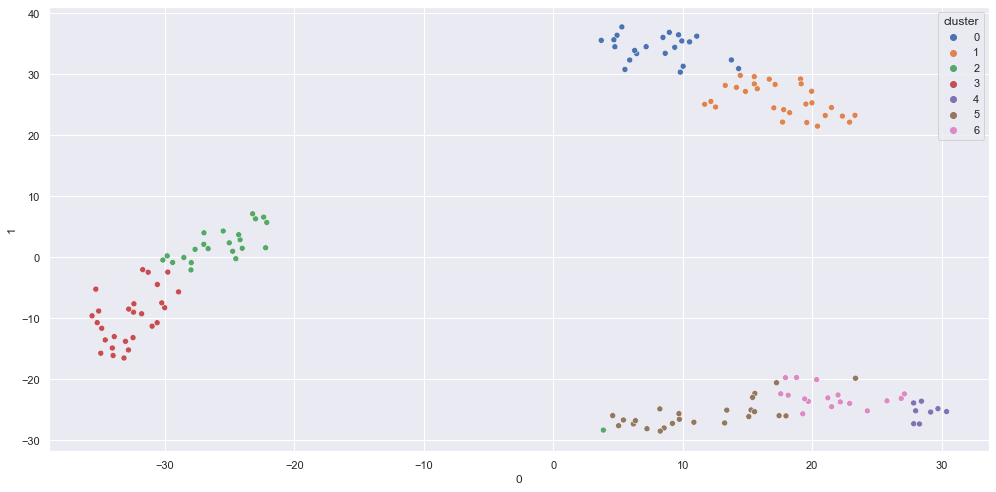

In [10]:
#affinity propagation with tsne

iris_data_affinity_propagation = iris_data_tsne.copy()
iris_data_affinity_propagation = iris_data_affinity_propagation.rename(columns = {r'type':r'cluster'})
iris_data_affinity_propagation [r'cluster'] = u1.apply_affinity_propagation(data=iris_data)
u1.plot_points_2d(data=iris_data_affinity_propagation, target_column=r'cluster', figsize=(14, 7))

<a name="exercise-sequence-data"></a><h2>Sequence data</h2>
<p>In this exercise you'll be working with <i>electricity demand</i> data as collected from the <i>Australian New South Wales Electricity Market</i>. It was first published/described by:</p>

<p><center><cite>M. Harries. Splice-2 comparative evaluation: Electricity pricing. Technical report, The University of South Wales, 1999. </cite></center></p>

Currently, it is maintained by the <a href="https://www.openml.org/home">OpenML</a> project:

<center><cite>Joaquin Vanschoren, Jan N. van Rijn, Bernd Bischl, and Luis Torgo. OpenML: networked science in machine learning. SIGKDD Explorations 15(2), pp 49-60, 2013.</cite></center></p>
<center><cite>Matthias Feurer, Jan N. van Rijn, Arlind Kadra, Pieter Gijsbers, Neeratyoy Mallik, Sahithya Ravi, Andreas Mueller, Joaquin Vanschoren, Frank Hutter. OpenML-Python: an extensible Python API for OpenML. arXiv:1911.02490 [cs.LG], 2019</cite></center></p>

<a name="exercise-sequence-data-one"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Load the <i>electricty</i> data set using the appropriate function as supplied by us.</li>
        <li>Visualize the electricity data set in tabular form. What is the size of the data set with respect to sample and feature counts?</li>
    </ul>
</div>

In [11]:
electricity_dataset = u1.load_electricity()
electricity_dataset

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,demand
0,0.0000,2.0,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,0
1,0.0000,2.0,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,0
2,0.0000,2.0,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,0
3,0.0000,2.0,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,0
4,0.0000,2.0,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,1
...,...,...,...,...,...,...,...,...,...
45307,0.9158,7.0,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,1
45308,0.9158,7.0,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,1
45309,0.9158,7.0,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,1
45310,0.9158,7.0,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,0


<a name="exercise-sequence-data-two"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Visualize the electricity data set using <i>lineplots</i> with <i>period</i> as the <i>x-axis</i>, once <i>nswdemand</i> and once <i>nswprice</i> as the <i>y-axis</i>. Colorized by the feature <i>day</i>.</li>
        <li>Do you observe any correlations between both plots?</li>
    </ul>
</div>

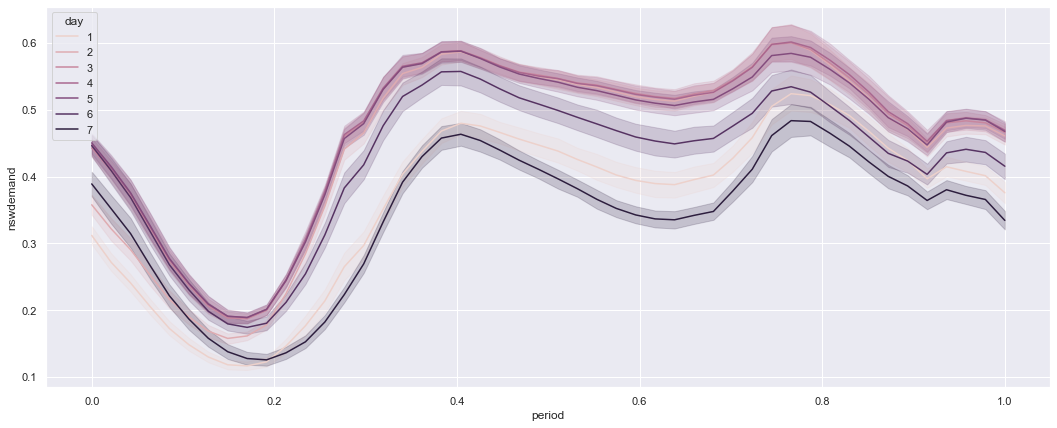

In [12]:
sns.set()

fig, ax = plt.subplots(1, 1, figsize=(18, 7))
_ = sns.lineplot(x=r'period', y=r'nswdemand', hue=r'day', sort=False, data=electricity_dataset, ax=ax)

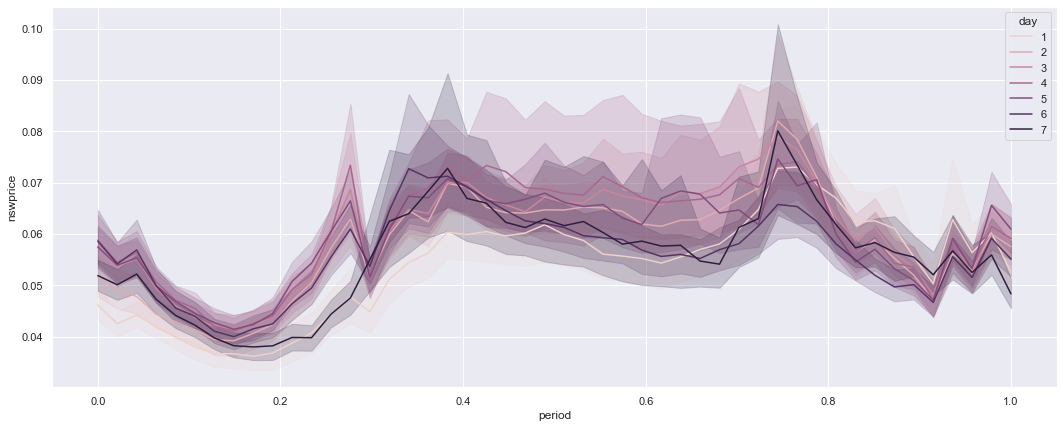

In [13]:
sns.set()

fig, ax = plt.subplots(1, 1, figsize=(18, 7))
_ = sns.lineplot(x=r'period', y=r'nswprice', hue=r'day', sort=False, data=electricity_dataset, ax=ax)

<a name="exercise-sequence-data-three"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Compute the total electricity demand <i>per day</i> for <i>NSW</i> as well as <i>VIC</i>. Hint: have a look at the <a href="https://pandas.pydata.org/docs/user_guide/groupby.html#splitting-an-object-into-groups">pandas documentation</a>.</li>
        <li>Visualize the total electricity demand <i>per day</i> and <i>state</i> (<i>NSW</i> and <i>VIC</i>). Do you expect what you observe?</li>
    </ul>
</div>

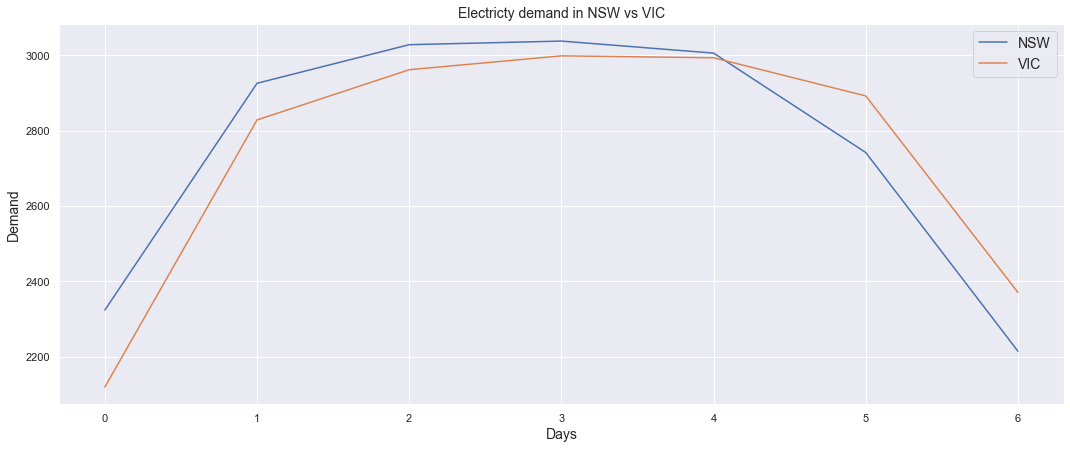

In [14]:
demand_per_day_nsw = electricity_dataset.groupby("day")['nswdemand'].sum()
demand_per_day_vic = electricity_dataset.groupby("day")["vicdemand"].sum()

"""
# Gotta figure out a way to plot them.. Data is okay.

sns.set()
fig, ax = plt.subplots(1, 1, figsize=(18, 7))
_ = sns.lineplot(x=r'day', y=demand_per_day_nsw.values, data=demand_per_day_nsw)
_ = sns.lineplot(x=r'day', y=demand_per_day_vic.values, data=demand_per_day_vic)
"""

fig, ax = plt.subplots(1, 1, figsize=(18, 7))
ax.plot(demand_per_day_nsw.values, label="NSW")
ax.plot(demand_per_day_vic.values, label="VIC")
ax.set_xlabel("Days", fontsize=14)
ax.set_ylabel("Demand", fontsize=14)
ax.set_title("Electricty demand in NSW vs VIC", fontsize=14)
ax.legend(fontsize=14)

<a name="image-data"></a><h2>Image data</h2>

<p>In this exercice you'll be working with a data set composed of various <i>images</i> of fashion items (e.g. shoes or shirts). The data set distinguishes <i>ten</i> different classes, one for each type of fashion item. For curious minds, more information regarding this data set can be found at:

<center><cite>Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747</cite></center>

You should already be familiar with this data set, hence the initial tabular visualization may be skipped.

<a name="exercise-image-data-one"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Load and optionally visualize the <i>Fashion-MNIST</i> data set using the appropriate function as supplied by us.</li>
        <li>Define the following filters and apply them on one of the <tt>fashion_mnist_sprite_[0-9].png</tt> images (with $*$ as the convolution and $\sigma{}$ as the sigmoid operation):</li>
    </ul>
    <p>
        \begin{equation}G_x = \left(
            \begin{array}{rrrrr}
                -1 &  1 &  0 & 1 & 1 \\
                -2 &  2 &  0 & 2 & 2 \\
                -3 &  3 &  0 & 3 & 3 \\
                -2 &  2 &  0 & 2 & 2 \\
                -1 &  1 &  0 & 1 & 1
            \end{array}\right) * \sigma{(A)}
        \end{equation}
    </p>
    <p>
        \begin{equation}G_y = \left(
            \begin{array}{rrrrr}
                 -1 &  -2 &  -3 &  -2  &  -1  \\
                  1 &   2 &   3 &   2  &   1  \\
                  0 &   0 &   0 &   0  &   0  \\
                  1 &   2 &   3 &   2  &   1  \\
                 -1 &  -2 &  -3 &  -2  &  -1
            \end{array}\right) * \sigma{(A)}
        \end{equation}
    </p>
    <ul>
        <li>Visualize the original as well as the resulting images.</li>
    </ul>
</div>

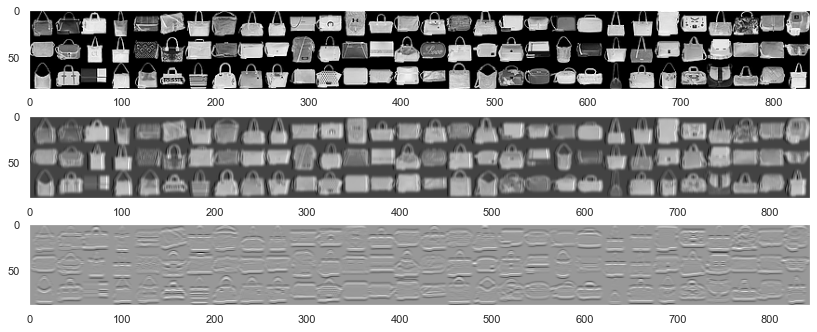

In [15]:
# Load the Fashion-MNIST.
data_fashion_mnist = u1.load_fashion_mnist()

# Define filters.
G_x = np.asarray([[-1,1,0,1,1],[-2,2,0,2,2],[-3,3,0,3,3],[-2,2,0,2,2],[-1,1,0,1,1]])
G_y = np.asarray([[-1,-2,-3,-2,-1],[1,2,3,2,1],[0,0,0,0,0],[1,2,3,2,1],[-1,-2,-3,-2,-1]])


# Apply the filtes on one of the fashion_mnist_sprite_[0-9].png images
class_index = random.randint(0,9)
image_path = f'resources/fashion_mnist_sprite_{class_index}.png'
with Image.open(image_path) as image_data:
    image_fashion_mnist = image_data.convert(r'L')
    
image_fashion_mnist_sigmoid = torch.sigmoid(
torch.as_tensor(np.array(image_fashion_mnist), dtype=torch.float)
)    
    
fig, ax = plt.subplots(3, 1, figsize=(14, 7))
fig.subplots_adjust(hspace=-0.35)
for axis in ax:
    axis.grid(False)

# Visualize the original as well as the resulting images.
_ = ax[0].imshow(image_fashion_mnist, cmap=r'gray')
_ = ax[1].imshow(signal.convolve2d(np.array(image_fashion_mnist),G_x), cmap=r'gray')
_ = ax[2].imshow(signal.convolve2d(np.array(image_fashion_mnist),G_y), cmap=r'gray')

<a name="exercise-image-data-two"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Implement a function for computing the output size of a convolution operation. Hint: have a look at the <a href="https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html">PyTorch documentation.</a></li>
        <li>Implement a class <tt>CNN</tt> with the following architecture:</li>
    </ul>
    <table style="text-align:center;vertical-align:middle">
        <th>Position</th>
        <th>Element</th>
        <th>Comment</th>
        <tr>
            <td>0</td>
            <td>input</td>
            <td>-</td>
        </tr>
        <tr>
            <td>1</td>
            <td>2D convolution</td>
            <td>$16$ output channels and $7$ filters</td>
        </tr>
        <tr>
            <td>2</td>
            <td>ReLU</td>
            <td>-</td>
        </tr>
        <tr>
            <td>3</td>
            <td>max. pooling</td>
            <td>kernel size of $3\times{}3$</td>
        </tr>
        <tr>
            <td>4</td>
            <td>2D convolution</td>
            <td>$8$ output channels and $3$ filters</td>
        </tr>
        <tr>
            <td>5</td>
            <td>ReLU</td>
            <td>-</td>
        </tr>
        <tr>
            <td>6</td>
            <td>max. pooling</td>
            <td>kernel size of $2\times{}2$</td>
        </tr>
        <tr>
            <td>7</td>
            <td>fully connected</td>
            <td>$64$ output features</td>
        </tr>
        <tr>
            <td>8</td>
            <td>ReLU</td>
            <td>-</td>
        </tr>
        <tr>
            <td>9</td>
            <td>fully connected</td>
            <td>$10$ output features</td>
        </tr>
        <tr>
            <td>10</td>
            <td>output</td>
            <td>-</td>
        </tr>
    </table>
    <ul>
        <li>Split the Fashion-MNIST data set in a <i>training</i> as well as <i>test</i> set in a ratio of $4 : 1$. Print the corresponding sizes.</li>
    </ul>
</div>

In [18]:
# Implement a function for computing the output size of a convolution operation.

def output_size_conv(input_size:int, kernel_size:int, stride:int=1, padding:int=0) -> int:
    out_size = ((input_size + 2 * padding + (kernel_size - 1) - 1) / stride) + 1
    return out_size

In [19]:
class CNN(torch.nn.Module):
    """
    CNN tailored to process Fashion-MNIST data.
    """
    
    def __init__(self, input_channels: int, output_size: int):
        super(CNN, self).__init__()
        self.input_channels = input_channels
        self.output_size = output_size
        
        self.CNN = torch.nn.Sequential(
            
            # size changes from (1, 28, 28) to (16, 22, 22).
            torch.nn.Conv2d(self.input_channels, 16, kernel_size=(7, 7)),
            torch.nn.ReLU(True),
            
            # Size changes from (16 ,22 ,22) to (16 ,7 ,7).
            torch.nn.MaxPool2d(3),
            
            # size changes from (16, 7, 7) to (8, 5, 5).
            torch.nn.Conv2d(16, 8, kernel_size=(3, 3)),
            torch.nn.ReLU(True),
            
            # size changes from (8, 5, 5) to (8, 2, 2).
            torch.nn.MaxPool2d(2),
            
            # Size changes from (8, 2, 2) to (8 * 2 * 2).
            torch.nn.Flatten()
        )
        
        self.FCN = torch.nn.Sequential(
            torch.nn.Linear(8 * 2 * 2, 64),
            torch.nn.ReLU(True), 
            torch.nn.Linear(64, 10)
        )
        
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.CNN(x)
        x = self.FCN(x)
        return x

In [20]:
# Split the Fashion-MNIST data set in a training as well as test set in a ratio of  4:1 . Print the corresponding sizes.
data_fashion_mnist_train, data_fashion_mnist_test = u1.split_data(data=data_fashion_mnist , test_size=0.2)
print(f'{"Full data set is of size:":>27} {len(data_fashion_mnist)}')
print(f'Training subset is of size: {len(data_fashion_mnist_train)}')
print(f'{"Testing subset is of size:":>27} {len(data_fashion_mnist_test)}')

  Full data set is of size: 70000
Training subset is of size: 56000
 Testing subset is of size: 14000


<a name="exercise-image-data-three"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Create a corresponding <tt>TensorDataset</tt> for the training as well as the test set.</li>
        <li>Wrap the previously defined <tt>TensorDataset</tt> instances in separate <tt>DataLoader</tt> instances with a batch size of $32$ (shuffle the training data set).</li>
        <li>Train a <tt>CNN</tt> network for $7$ epochs, print the training accuracy as well as the loss per epoch and report the final test set loss and accuracy.</li>
    </ul>
</div>

In [21]:
# Set random seed for reproducibility.
np.random.seed(seed=42)
torch.manual_seed(seed=42)

# Create data loader for iterating the Fashion-MNIST training data set.
loader_fashion_mnist_train = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(
    torch.from_numpy(data_fashion_mnist_train.drop(columns=[r'item_type']).values.astype(
        dtype=np.float32)).unsqueeze(1).reshape(len(data_fashion_mnist_train), 1, 28, 28),
    torch.from_numpy(data_fashion_mnist_train[r'item_type'].values.astype(dtype=np.long))
), batch_size=32, shuffle=True, drop_last=False)

# Create data loader for iterating the Fashion-MNIST test data set.
loader_fashion_mnist_test = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(
    torch.from_numpy(data_fashion_mnist_test.drop(columns=[r'item_type']).values.astype(
        dtype=np.float32)).unsqueeze(1).reshape(len(data_fashion_mnist_test), 1, 28, 28),
    torch.from_numpy(data_fashion_mnist_test[r'item_type'].values.astype(dtype=np.long))
), batch_size=32, shuffle=False, drop_last=False)

In [22]:
# Set random seed for reproducibility.
np.random.seed(seed=42)
torch.manual_seed(seed=42)

# Create CNN instance and the corresponding optimizer to use.
target_device = torch.device(r'cuda' if torch.cuda.is_available() else r'cpu')
cnn_model = CNN(1, 10).to(target_device)
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=1e-3)

# Train and evaluate CNN instance on the Fashion-MNIST training set.
num_epochs = 3
for epoch in range(num_epochs):
    
    # Train CNN instance for one epoch.
    u1.train_network(
        model=cnn_model, data_loader=loader_fashion_mnist_train, device=target_device, optimizer=optimizer)
    
    # Evaluate current CNN instance.
    performance = u1.test_network(
        model=cnn_model, data_loader=loader_fashion_mnist_train, device=target_device)
    
    # Print result of current epoch to standard out.
    print(f'Epoch: {str(epoch + 1).zfill(len(str(num_epochs)))} ' +
          f'/ Loss: {performance[0]:.4f} / Accuracy: {performance[1]:.4f}')

# Evaluate final model on test data set.
performance = u1.test_network(
    model=cnn_model, data_loader=loader_fashion_mnist_test, device=target_device)
print(f'\nFinal loss: {performance[0]:.4f} / Final accuracy: {performance[1]:.4f}')

Epoch: 1 / Loss: 0.0160 / Accuracy: 0.8096
Epoch: 2 / Loss: 0.0146 / Accuracy: 0.8237
Epoch: 3 / Loss: 0.0142 / Accuracy: 0.8318

Final loss: 0.0149 / Final accuracy: 0.8269
